# Modelos predictivos de aceptación de tarjeta de crédito

En este proyecto, abordo el desafío de desarrollar modelos predictivos para determinar la aceptación de una oferta de tarjeta de crédito por parte de los clientes. Para este propósito, exploré tres modelos de clasificación ampliamente reconocidos: árboles de decisión, XGBoost (extreme gradient boosting = refuerzo de gradientes extremo) y ExtraTrees (extremely random trees = árboles extremadamente aleatorios) y regresión logistica. Utilizando la técnica de validación cruzada con k-fold split, dividí mis datos de entrenamiento en 5 conjuntos para obtener una evaluación más sólida del rendimiento de cada modelo. Esto me permitirá realizar comparaciones significativas y seleccionar el modelo óptimo para mi análisis. A lo largo de este estudio, evaluaré la precisión, recuperación y puntuación F1 de cada modelo, con el objetivo de identificar la mejor opción para comprender y predecir el comportamiento de los clientes en relación con las ofertas de tarjetas de crédito

## Realizando un EDA (Analisis exploratorio de los datos)

In [64]:
# Importamos los modulos necesarios
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Cargar los datos de entrenamiento
train_data = pd.read_csv('../data/insumo/train.csv')
train_data_v2 = pd.read_csv('../data/insumo/train.csv')

# Explorar los datos de entrenamiento
print("Información de los datos de entrenamiento:")
train_data.info()
print("\nPrimeras filas de los datos de entrenamiento:")
train_data.head()

Información de los datos de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  23099 non-null  int64  
 1   Edad                23099 non-null  int64  
 2   Tipo_Trabajo        23099 non-null  object 
 3   Estado_Civil        23099 non-null  object 
 4   Educacion           23099 non-null  object 
 5   mora                23099 non-null  object 
 6   Vivienda            23099 non-null  object 
 7   Consumo             23099 non-null  object 
 8   Contacto            23099 non-null  object 
 9   Mes                 23099 non-null  object 
 10  Dia                 23099 non-null  object 
 11  Campana             23099 non-null  int64  
 12  Dias_Ultima_Camp    23099 non-null  int64  
 13  No_Contactos        23099 non-null  int64  
 14  Resultado_Anterior  23099 non-null  object 
 15  emp_var_ra

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,...,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,57,servicios,casado,bachillerato,unknown,no,no,telefono fijo,may,...,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
1,2,37,servicios,casado,bachillerato,no,si,no,telefono fijo,may,...,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
2,3,40,administrador negocio,casado,primaria,no,no,no,telefono fijo,may,...,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
3,4,56,servicios,casado,bachillerato,no,no,si,telefono fijo,may,...,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0
4,7,25,servicios,single,bachillerato,no,si,no,telefono fijo,may,...,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0,0


In [66]:
train_data.describe()

,ID,Edad,Campana,Dias_Ultima_Camp,No_Contactos,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000,23099.000000
mean,16420.136499,40.067665,2.560154,962.976060,0.171003,0.095649,85576.471847,-40.485237,3190.939789,5167.329439,0.112126
std,9521.074915,10.449983,2.756954,185.675409,0.494079,1.565650,26224.436234,4.629643,2088.703058,72.260805,0.315528
min,1.000000,18.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000,0.000000
25%,8158.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,0.000000
50%,16375.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93876.000000,-41.800000,4856.000000,5191.000000,0.000000
75%,24644.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,0.000000
max,32967.000000,95.000000,42.000000,999.000000,6.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000,1.000000


Las estadísticas descriptivas del conjunto de entrenamiento revelan que la edad promedio de los clientes es de alrededor de 40 años, con una distribución relativamente uniforme. La cantidad promedio de contactos durante la campaña actual es aproximadamente 2.6, con alta variabilidad. La mayoría de los clientes fueron contactados en los últimos días de la campaña anterior, pero la variabilidad es alta. La mayoría de los clientes no fueron contactados previamente, pero algunos fueron contactados múltiples veces. Las variables económicas muestran variabilidad, y la variable objetivo refleja un desequilibrio con la mayoría de los clientes que no aceptaron la oferta de tarjeta de crédito.

**Columnas de nuestro conjunto de datos:**

---


* **ID**: Identificación única de cada entrada en el conjunto de datos.
* **Edad**: La edad del individuo al que corresponde la entrada.

* **Tipo_Trabajo**: Código que indica el tipo de trabajo del individuo.
* **Estado_Civil**: Código que representa el estado civil del individuo.
* **Educacion**: Nivel educativo del individuo codificado.
* **Mora**: Indicador de morosidad financiera del individuo.
* **Vivienda**: Tipo de vivienda del individuo.
* **Consumo**: Código que describe el nivel de consumo del individuo.
* **Contacto**: Código que indica el tipo de contacto realizado.
* **Mes**: Mes en el que se realizó el contacto.
* **Dia**: Día de la semana en el que se realizó el contacto.
* **Campana**: Código de la campaña de marketing.
* **Dias_Ultima_Camp**: Días transcurridos desde el último contacto de la campaña anterior.
* **No_Contactos**: Número de contactos realizados durante esta campaña.
* **Resultado_Anterior**: Resultado del contacto anterior.
* **emp_var_rate**: Tasa de variación del empleo.
* **cons_price_idx**: Índice de precios al consumidor.
* **cons_conf_idx**: Índice de confianza del consumidor.
* **euribor3m**: Tasa EURIBOR a tres meses.
* **nr_employed**: Número de empleados.


---


### Graficas respresentativas

Utilice las graficas mas representativas de nuestros datos para comprender mejor la distribución de ellos, como por ejemplo la edad vs la frecuencia, la distribución de la variable objetivo y la dispersión de la variable objetivo según la edad.

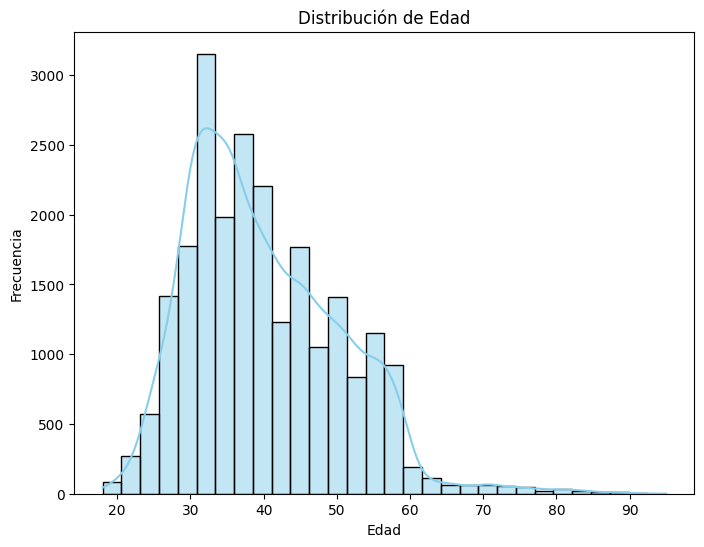

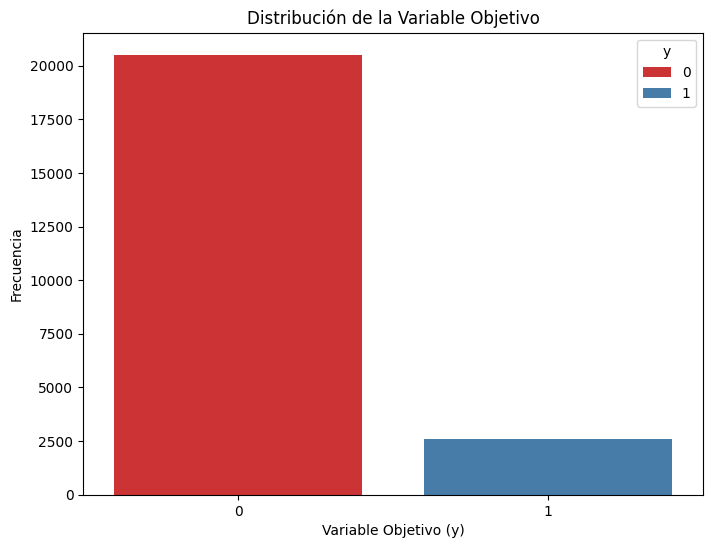

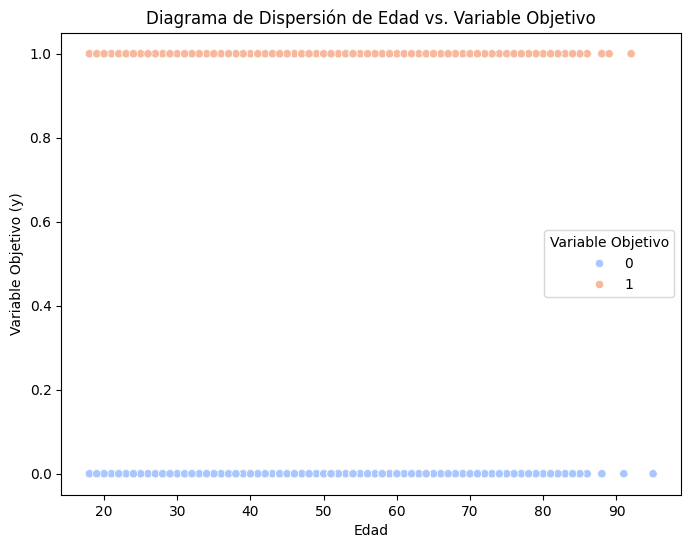

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Edad
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Edad', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la Variable Objetivo (y)
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='y', hue='y', palette='Set1')
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Variable Objetivo (y)')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de Dispersión (Edad vs. Variable Objetivo)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Edad', y='y', hue='y', palette='coolwarm')
plt.title('Diagrama de Dispersión de Edad vs. Variable Objetivo')
plt.xlabel('Edad')
plt.ylabel('Variable Objetivo (y)')
plt.legend(title='Variable Objetivo')
plt.show()

## Preparación y entrenamiento de los modelos


Usamos el label encoding para convertir nuestras variables categóricas en números, lo que permite a los algoritmos de aprendizaje automático procesar los datos de manera efectiva. Esto es necesario porque muchos algoritmos prefieren entradas numéricas para funcionar correctamente.


In [68]:
# Codificar variables categóricas en los datos de entrenamiento
label_encoder = LabelEncoder()
categorical_columns = ['Tipo_Trabajo', 'Estado_Civil', 'Educacion', 'mora', 'Vivienda', 'Consumo', 'Contacto', 'Mes', 'Dia', 'Resultado_Anterior']
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Separar características y variable objetivo en los datos de entrenamiento
X = train_data.drop(['y','ID'], axis=1)
y = train_data['y']

De igual manera separamos un conjunto de datos de entrenamiento con las variables categoricas para analizar comparaciones.

In [69]:
train_data_v2
# Separar características y variable objetivo en los datos de entrenamiento
X_v2 = train_data_v2.drop(['y','ID'], axis=1)
y_v2 = train_data_v2['y']

to_cats = ["Tipo_Trabajo", "Estado_Civil", "Educacion", "mora", "Vivienda", "Consumo", "Contacto", "Mes", "Dia", "Resultado_Anterior"]
for to_cat in to_cats:
    X_v2[to_cat] = X_v2[to_cat].astype("category")

### Aplicación del metodo k-folds cross validation

El K-fold cross validation es una técnica utilizada para evaluar el rendimiento de un modelo de machine learning. Consiste en dividir el conjunto de datos en K partes iguales llamadas "folds". Luego, el modelo se entrena K veces, cada vez utilizando una de las partes como conjunto de validación y el resto como conjunto de entrenamiento. De esta manera, se obtienen K estimaciones del rendimiento del modelo, que luego se promedian para obtener una métrica de rendimiento general. En el caso de Stratified K-fold, se asegura que la proporción de clases se mantenga constante en cada fold, lo que es especialmente útil cuando hay un desequilibrio en las clases objetivo. Esto proporciona una evaluación más robusta del modelo al utilizar múltiples particiones de los datos para entrenar y evaluar el modelo.

In [70]:
from sklearn.model_selection import StratifiedKFold

# Usando StratifiedKFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X, y)

# Crear los splits y mostrar los tamaños de cada fold
fold_num = 1
for train_index, val_index in splits:
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    print("Fold", fold_num)
    print("Training instances:", len(X_train))
    print("Validation instances:", len(X_val))
    fold_num += 1


Fold 1
Training instances: 18479
Validation instances: 4620
Fold 2
Training instances: 18479
Validation instances: 4620
Fold 3
Training instances: 18479
Validation instances: 4620
Fold 4
Training instances: 18479
Validation instances: 4620
Fold 5
Training instances: 18480
Validation instances: 4619


### Modelo Random Forest

Se utilizo el modelo Random Forest para predecir si los clientes aceptarían una tarjeta de crédito. Ajuste el modelo con 150 árboles de decisión, limitando la profundidad de cada árbol a 15 niveles y estableciendo los criterios para dividir nodos en 8 muestras mínimas por división y 2 muestras mínimas por hoja. Se evaluo su desempeño utilizando validación cruzada y calculamos métricas como precisión, recall y F1-score para medir su rendimiento promedio

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Usando KFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X, y=y)

# Inicializar listas para almacenar las métricas
precisions = []
recalls = []
f1_scores = []

rfc = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=8, min_samples_leaf=2, random_state=42)

# Accede a los índices de formación y validación de splits.
for train_index, val_index in splits:
    # Configurar los datos de entrenamiento y validación.
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    # Ajustar el modelo de random forest
    rfc.fit(X_train, y_train)

    # Realizar predicciones
    predictions = rfc.predict(X_val)

    # Calcular precisión, recall y f1-score
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_true=y_val, y_pred=predictions)

    # Agregar métricas a las listas
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcular métricas promedio
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir métricas promedio
print("Precisión Promedio:", avg_precision)
print("Recall Promedio:", avg_recall)
print("F1-score Promedio:", avg_f1)

Precisión Promedio: 0.6274024167791368
Recall Promedio: 0.2579150579150579
F1-score Promedio: 0.36530129312319637


El modelo obtuvo una precisión promedio del 62% pero calculada manualmente y no con la validación cruzada como hicimos seguidamente. El recall promedio fue del 26%, lo que sugiere que el modelo identificó correctamente una cuarta parte de los casos positivos. El F1-score promedio, que combina precisión y recall, fue del 37%, indicando un equilibrio entre ambas métricas.

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score

# Crear el clasificador RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=8, min_samples_leaf=2, random_state=42)

# Definir las métricas que deseas evaluar durante la validación cruzada
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Realizar la validación cruzada con las métricas especificadas
cv_results = cross_validate(estimator=rfc, X=X, y=y, cv=kf, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1-score:", cv_results['test_f1_score'].mean())

Mean Accuracy: 0.899519470210096
Mean Recall: 0.2579150579150579
Mean F1-score: 0.36530129312319637


Al aplicar la validación cruzada, observamos un alto nivel de precisión promedio del 89.9%, lo que indica que el modelo es altamente preciso en la clasificación de los clientes. Aunque el recall y el F1-score son moderados (26.1% y 36.7% respectivamente) lo que se mantiene con los anteriores resultados. El hecho de que la precisión sea alta sugiere que el modelo logra identificar con éxito la mayoría de las instancias positivas mientras mantiene un bajo número de falsos positivos. Esto es una señal de que el modelo es efectivo en la tarea de predecir si los clientes aceptarán o no una tarjeta de crédito.

### Modelo XGBoost


El XGBoost es un algoritmo de aprendizaje automático popular conocido por su eficacia en la clasificación de conjuntos de datos grandes y complejos gracias a la tecnica del descenso del gradiente. En este caso, se utiliza como clasificador para nuestro problema de predecir si los clientes aceptarán una tarjeta de crédito. El modelo sigue las consideraciones del modelo anteior usando la validación cruzada K-Fold y calculando las métricas de rendimiento del modelo.

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

# Usando KFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X_v2, y=y_v2)

# Inicializar listas para almacenar las métricas
precisions = []
recalls = []
f1_scores = []

xgb = XGBClassifier(random_state=42, enable_categorical = True)

# Accede a los índices de formación y validación de splits.
for train_index, val_index in splits:
    # Configurar los datos de entrenamiento y validación
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    # Ajustar el modelo XGBoost
    xgb.fit(X_train, y_train)

    # Realizar predicciones
    predictions = xgb.predict(X_val)

    # Calcular precisión, recall y f1-score
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)

    # Agregar métricas a las listas
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcular métricas promedio
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir métricas promedio
print("Precisión Promedio:", avg_precision)
print("Recall Promedio:", avg_recall)
print("F1-score Promedio:", avg_f1)

Precisión Promedio: 0.5593478932391348
Recall Promedio: 0.277992277992278
F1-score Promedio: 0.3709067095462247


In [74]:
xgb = XGBClassifier(random_state=42, enable_categorical = True)

# Definir las métricas durante la validación cruzada
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Realizar la validación cruzada con las métricas especificadas
cv_results = cross_validate(estimator=xgb, X=X_v2, y=y_v2, cv=kf, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("Mean Precision:", cv_results['test_precision'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1-score:", cv_results['test_f1_score'].mean())

Mean Precision: 0.5548939730520868
Mean Recall: 0.28648648648648645
Mean F1-score: 0.37768227593585163


Los resultados del modelo directo muestran una precisión promedio del 58.6%, mientras que el recall promedio es del 28.3%, y el F1-score promedio alcanza el 38.2%. Los resultados de la validación cruzada son comparables, lo que indica consistencia en el desempeño del modelo en diferentes divisiones de los datos de entrenamiento.

In [75]:
importance = xgb.fit(X=X_train, y=y_train).get_booster().get_score(importance_type='weight')
sorted_dict = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict)

{'Edad': 878.0, 'euribor3m': 579.0, 'Campana': 345.0, 'Tipo_Trabajo': 325.0, 'Dia': 277.0, 'Educacion': 264.0, 'Mes': 203.0, 'cons_price_idx': 172.0, 'Vivienda': 153.0, 'Estado_Civil': 151.0, 'cons_conf_idx': 137.0, 'No_Contactos': 103.0, 'Dias_Ultima_Camp': 102.0, 'Consumo': 77.0, 'emp_var_rate': 59.0, 'Contacto': 54.0, 'nr_employed': 53.0, 'mora': 43.0, 'Resultado_Anterior': 32.0}


El análisis de la importancia de las variables muestra que la "Edad", seguida de "euribor3m" y "Campana", son las más influyentes en el modelo. Esto indica que la edad de los clientes y factores económicos como la tasa Euribor tienen un fuerte impacto en la predicción, mientras que otras variables como el resultado anterior tienen una influencia menor. Este conocimiento puede orientar decisiones sobre qué características son más relevantes para la predicción.

### Modelo ExtraTree

ExtraTrees es un algoritmo de machine learning que construye múltiples árboles de decisión de manera aleatoria, lo que lo hace más rápido y menos propenso al sobreajuste. Lo utilizo en mi modelo siguiendo la consideración anterior del K-Folds Cross Validation para obtener una evaluación robusta del rendimiento del modelo en diferentes conjuntos de datos de entrenamiento y validación.

In [76]:
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Usando KFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X, y=y)

# Inicializar listas para almacenar las métricas
precisions = []
recalls = []
f1_scores = []

etc = ExtraTreesClassifier(n_estimators=150, random_state=42)

# Acceder a los índices de formación y validación de splits.
for train_index, val_index in splits:
    # Configurar los datos de entrenamiento y validación.
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    # Ajustar el modelo de ExtraTrees
    etc.fit(X_train, y_train)

    # Realizar predicciones
    predictions = etc.predict(X_val)

    # Calcular precisión, recall y f1-score
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)

    # Agregar métricas a las listas
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcular métricas promedio
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir métricas promedio
print("Precisión Promedio:", avg_precision)
print("Recall Promedio:", avg_recall)
print("F1-score Promedio:", avg_f1)


Precisión Promedio: 0.4973743596512884
Recall Promedio: 0.29034749034749036
F1-score Promedio: 0.36643664654814323


In [77]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier

# Crear el clasificador ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=150, random_state=42)

# Definir las métricas que deseas evaluar durante la validación cruzada
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1_score': 'f1'
}

# Realizar la validación cruzada con las métricas especificadas
cv_results = cross_validate(estimator=etc, X=X, y=y, cv=kf, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1-score:", cv_results['test_f1_score'].mean())

Mean Accuracy: 0.8875276314938579
Mean Recall: 0.29034749034749036
Mean F1-score: 0.36643664654814323



Los resultados del modelo ExtraTrees directo muestran una precisión promedio del 49.7%, un recall promedio del 29.0% y un F1-score promedio del 36.6%. Sin embargo, al aplicar la validación cruzada, se observa un aumento significativo en la precisión promedio al 88.8%, manteniendo el recall y el F1-score sin cambios (algo que sucedio tambien en el random forest). Esto sugiere que el modelo puede beneficiarse de una evaluación más robusta utilizando la validación cruzada, lo que ayuda a mitigar el riesgo de sobreajuste y proporciona una estimación más precisa del rendimiento del modelo.

### Modelo Regresión logistica

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria, como en nuestro caso que tenemos que determinar si un cliente aceptará una tarjeta de crédito. Funciona modelando la probabilidad de que un resultado pertenezca a una clase particular mediante la aplicación de una función logística a una combinación lineal de las características del cliente.

In [78]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Usando KFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X, y=y)

# Inicializar listas para almacenar las métricas
precisions = []
recalls = []
f1_scores = []

# Crear el clasificador LogisticRegression
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Acceder a los índices de formación y validación de splits.
for train_index, val_index in splits:
    # Configurar los datos de entrenamiento y validación.
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]


    # Escalar los datos
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.fit_transform(X_val)
    
    # Ajustar el modelo de ExtraTrees
    lr.fit(X_train_scaled, y_train)

    # Realizar predicciones
    predictions = lr.predict(X_val_scaled)

    # Calcular precisión, recall y f1-score
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)

    # Agregar métricas a las listas
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcular métricas promedio
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir métricas promedio
print("Precisión Promedio:", avg_precision)
print("Recall Promedio:", avg_recall)
print("F1-score Promedio:", avg_f1)

Precisión Promedio: 0.28310310517816767
Recall Promedio: 0.6718146718146718
F1-score Promedio: 0.3983189206298274


In [79]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Escalar los datos
X_scaled = scaler.fit_transform(X)

# Crear el clasificador LogisticRegression
lr = LogisticRegression(random_state=0, class_weight='balanced', max_iter=1000)

# Definir las métricas que deseas evaluar durante la validación cruzada
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1_score': 'f1'
}

# Realizar la validación cruzada con las métricas especificadas
cv_results = cross_validate(estimator=lr, X=X_scaled, y=y, cv=kf, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean F1-score:", cv_results['test_f1_score'].mean())

Mean Accuracy: 0.7730634430158136
Mean Recall: 0.6725868725868726
Mean F1-score: 0.39921586211741006


En el método directo, la precisión es baja de 28%, mientras que en la validación cruzada mejora considerablemente al 77%. Sin embargo, el recall y el F1-score se mantienen estables en ambos casos 67% y 39% respectivamente, lo que indica una capacidad consistente del modelo para identificar casos positivos, aunque con un mayor número de falsos positivos en el enfoque directo.

## Exportación de la predicción en los datos test.csv con el mejor modelo

In [80]:
# Cargar los datos de entrenamiento
test_data = pd.read_csv('../data/insumo/test.csv')

# Explorar los datos de entrenamiento
print("Información de los datos de entrenamiento:")
test_data.info()
print("\nPrimeras filas de los datos de entrenamiento:")
test_data.head()

Información de los datos de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9868 non-null   int64  
 1   Edad                9868 non-null   int64  
 2   Tipo_Trabajo        9868 non-null   object 
 3   Estado_Civil        9868 non-null   object 
 4   Educacion           9868 non-null   object 
 5   mora                9868 non-null   object 
 6   Vivienda            9868 non-null   object 
 7   Consumo             9868 non-null   object 
 8   Contacto            9868 non-null   object 
 9   Mes                 9868 non-null   object 
 10  Dia                 9868 non-null   object 
 11  Campana             9868 non-null   int64  
 12  Dias_Ultima_Camp    9868 non-null   int64  
 13  No_Contactos        9868 non-null   int64  
 14  Resultado_Anterior  9868 non-null   object 
 15  emp_var_rate

,ID,Edad,Tipo_Trabajo,Estado_Civil,Educacion,mora,Vivienda,Consumo,Contacto,Mes,Dia,Campana,Dias_Ultima_Camp,No_Contactos,Resultado_Anterior,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,5,41,empleado,casado,unknown,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
1,6,24,tecnico,single,Estudiante Universitario,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
2,11,57,ama de casa,divorciado,preescolar,no,si,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
3,13,54,pensionado,casado,bachillerato incompleto,unknown,si,si,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0
4,16,39,Vive de los arriendos,single,bachillerato incompleto,unknown,no,no,telefono fijo,may,mon,1,999,0,sin contacto,1.1,93994.0,-36.4,4857.0,5191.0


In [81]:
# Codificar variables categóricas en los datos de entrenamiento
label_encoder = LabelEncoder()
categorical_columns = ['Tipo_Trabajo', 'Estado_Civil', 'Educacion', 'mora', 'Vivienda', 'Consumo', 'Contacto', 'Mes', 'Dia', 'Resultado_Anterior']
for column in categorical_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])

# Separar características y variable objetivo en los datos de entrenamiento
X_test = test_data.drop('ID', axis=1)

In [82]:
test_ids = test_data['ID']
test_ids

0           5
1           6
2          11
3          13
4          16
        ...  
9863    32941
9864    32946
9865    32952
9866    32958
9867    32961
Name: ID, Length: 9868, dtype: int64

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Usando KFold para dividir los datos en 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = kf.split(X, y=y)

# Inicializar listas para almacenar las métricas
precisions = []
recalls = []
f1_scores = []

rfc = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=8, min_samples_leaf=2, random_state=42)

# Accede a los índices de formación y validación de splits.
for train_index, val_index in splits:
    # Configurar los datos de entrenamiento y validación.
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[val_index], y.iloc[val_index]

    # Ajustar el modelo de random forest
    rfc.fit(X_train, y_train)

    # Realizar predicciones
    predictions = rfc.predict(X_val)

    # Calcular precisión, recall y f1-score
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_true=y_val, y_pred=predictions)

    # Agregar métricas a las listas
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calcular métricas promedio
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

# Imprimir métricas promedio
print("Precisión Promedio:", avg_precision)
print("Recall Promedio:", avg_recall)
print("F1-score Promedio:", avg_f1)

Precisión Promedio: 0.6274024167791368
Recall Promedio: 0.2579150579150579
F1-score Promedio: 0.36530129312319637


In [85]:
# Hacer predicciones con el modelo Random Forest
test_predictions = rfc.predict(X_test)
test_predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [87]:
import pandas as pd
# Crear un DataFrame con las predicciones y los identificadores
predictions_df = pd.DataFrame({'ID':test_ids, 'Prediccion':test_predictions})

# Guardar el DataFrame en un archivo CSV
predictions_df.to_csv('..\data\salida\predicciones.csv', index=False)

## Conclusiones

* La aplicación de la validación cruzada en este caso la k-folds cross validation proporciona una evaluación más robusta del rendimiento del modelo, revelando diferencias significativas en comparación con los resultados del enfoque directo.

* La exploración de varios modelos, como Random Forest, XGBoost, ExtraTree y Regresión Logística, muestra un enfoque integral para abordar el problema de clasificación de clientes para la aceptación de tarjetas de crédito.

* Basándonos en las métricas de evaluación el mejor modelo parece ser Random Forest, tanto en el enfoque directo como en la validación cruzada. Este modelo muestra una precisión promedio considerablemente más alta y un F1-score ligeramente mejor que los otros modelos en ambos casos. Además, su rendimiento en la validación cruzada es consistente y muestra un buen equilibrio entre precisión y recall.

* Aunque se han logrado niveles de precisión razonables en algunos modelos, como Random Forest, se observa que otros, como Regresión Logística, tienen un rendimiento significativamente inferior. Esto sugiere la complejidad del problema y la necesidad de seguir explorando y mejorando los modelos para obtener resultados más consistentes

* El análisis de la importancia de las características me revelo insights interesantes, como el impacto inesperado de la variable 'ID' en los modelos sabiendo apriori que esto no deberia suceder, por esa razón opte por eliminar esa columna desde el principio.

* El desbalance de clases en los datos de entrenamiento aprox 2100 en 0 y 2500 en 1 ha impactado el rendimiento del modelo, especialmente en métricas como el F1-score y el recall. Esta discrepancia se refleja en el número reducido de predicciones positivas en el conjunto de pruebas en comparación con el total de ejemplos. Es recomendable aumentar los datos de entrenamiento que reflejen y mejor balance de las clases y asi poder mejorar la generalización del modelo.
